In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import csv
from sklearn.preprocessing import Imputer, LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
original_test_data = test_data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE1CF82668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001EE1CFE5160>], dtype=object)

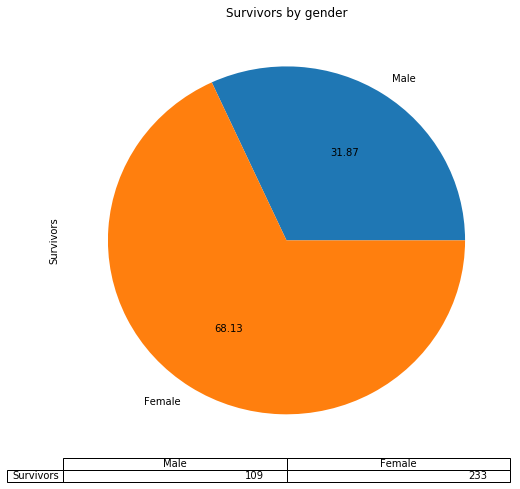

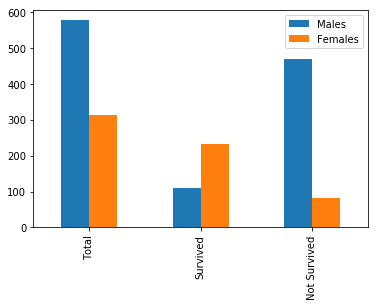

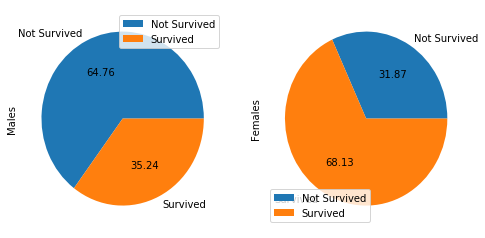

In [6]:
survivors = train_data[train_data['Survived']==1]
males = train_data[train_data['Sex']=='male'].count()['PassengerId']
females = train_data[train_data['Sex']=='female'].count()['PassengerId']
total = train_data.count()['PassengerId']

male_surv = survivors[survivors['Sex']=='male'].sum()['Survived']
female_surv = survivors[survivors['Sex']=='female'].sum()['Survived']

df = pd.Series([male_surv, female_surv], index=['Male', 'Female'], name='Survivors')
df.plot.pie(autopct='%.2f', figsize=(8, 8), title='Survivors by gender', table=True)

surv_bar = pd.DataFrame([[males, females], [male_surv, female_surv], [males-male_surv, females-female_surv]],
                         columns=['Males', 'Females'], index=['Total', 'Survived', 'Not Survived'])
surv_bar.plot.bar()

male_vs_female = pd.DataFrame([[males, male_surv], [females, female_surv]],
                              columns=['Males', 'Females'], index=['Not Survived', 'Survived'])
male_vs_female.plot.pie(autopct='%.2f', figsize=(8, 4), subplots=True)


Transforming all the NaN values to integers (mean)

In [7]:
def nan_padding(data, columns):
    for column in columns:
        imputer=Imputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data

In [8]:
nan_columns = ["Age", "SibSp", "Parch"]
train_data = nan_padding(train_data, nan_columns)
test_data = nan_padding(test_data, nan_columns)

In [9]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0.0,0.0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0.0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3.0,1.0,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0.0,2.0,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.0,0.0,237736,30.0708,NaN,C


Changing the "Ticket class" column from 1st, 2nd and 3rd values to three hit/miss column

In [10]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data
dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [11]:
train_data

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,NaN,S,0,0,1
5,6,0,"Moran, Mr. James",male,29.699118,0.0,0.0,330877,8.4583,NaN,Q,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0.0,17463,51.8625,E46,S,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",male,2.000000,3.0,1.0,349909,21.0750,NaN,S,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0.0,2.0,347742,11.1333,NaN,S,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.0,0.0,237736,30.0708,NaN,C,0,1,0


Changing the gender from "Male"/"Female" to int(1/0) 

In [12]:
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)

In [13]:
train_data

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1.0,0.0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1.0,0.0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.000000,0.0,0.0,373450,8.0500,NaN,S,0,0,1
5,6,0,"Moran, Mr. James",1,29.699118,0.0,0.0,330877,8.4583,NaN,Q,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",1,54.000000,0.0,0.0,17463,51.8625,E46,S,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",1,2.000000,3.0,1.0,349909,21.0750,NaN,S,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0.0,2.0,347742,11.1333,NaN,S,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1.0,0.0,237736,30.0708,NaN,C,0,1,0


In [14]:
def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)

In [15]:
train_data

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,0.271174,1.0,0.0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1.0,0.0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0.321438,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1.0,0.0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",1,0.434531,0.0,0.0,373450,8.0500,NaN,S,0,0,1
5,6,0,"Moran, Mr. James",1,0.367921,0.0,0.0,330877,8.4583,NaN,Q,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",1,0.673285,0.0,0.0,17463,51.8625,E46,S,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",1,0.019854,3.0,1.0,349909,21.0750,NaN,S,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.334004,0.0,2.0,347742,11.1333,NaN,S,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.170646,1.0,0.0,237736,30.0708,NaN,C,0,1,0


In [16]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [17]:
train_data

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1.0,0.0,0,0,1
1,1,0,0.472229,1.0,0.0,1,0,0
2,1,0,0.321438,0.0,0.0,0,0,1
3,1,0,0.434531,1.0,0.0,1,0,0
4,0,1,0.434531,0.0,0.0,0,0,1
5,0,1,0.367921,0.0,0.0,0,0,1
6,0,1,0.673285,0.0,0.0,1,0,0
7,0,1,0.019854,3.0,1.0,0,0,1
8,1,0,0.334004,0.0,2.0,0,0,1
9,1,0,0.170646,1.0,0.0,0,1,0


In [18]:
def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

In [19]:
train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))

print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(712, 7)
train_y:(712, 1)
train_y content:[[0]
 [0]
 [0]]
valid_x:(179, 7)
valid_y:(179, 1)


In [20]:
x = tf.placeholder(tf.float32, shape=(None, train_x.shape[1]))
y = tf.placeholder(tf.float32, shape=(None, 1))
weights = tf.Variable(tf.random_normal(shape=[train_x.shape[1], 1]), name='weights')
bias = tf.Variable(tf.random_normal(shape=[1]), name='bias')
sigmoid = tf.nn.sigmoid(tf.add(tf.matmul(x, weights), bias), name='sigmoid')
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=sigmoid, name='loss'))

learning_rate = 0.1
batch_size = train_x.shape[1] #128
training_epochs = 2000

In [21]:
optimaizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
pred = tf.cast(tf.greater_equal(sigmoid, 0.5), tf.float32, name='prediction')
acc = tf.reduce_mean(tf.cast(tf.equal(pred, y), tf.float32), name='accurecy')
init = tf.global_variables_initializer()

In [22]:

with tf.Session() as sess:
    sess.run(init)
    total_batch = int(len(train_x)/batch_size)
    acc_list = []
    avg_cost = []
    for epoch in range(training_epochs+1):
        temp_cost = []
        for batch in range(total_batch):
            _, c = sess.run([optimaizer, loss], feed_dict={x: train_x[batch*batch_size:(batch+1)*batch_size],
                                                           y:train_y[batch*batch_size:(batch+1)*batch_size]})
            temp_cost.append(c)
            avg_cost.append(c)
            acc_list.append(sess.run(acc, feed_dict={x: valid_x, y:valid_y}))
        if epoch % 10 ==0:
            acc_train = sess.run(acc, feed_dict={x: valid_x, y:valid_y})
            print('Epoch: {}/{}, cost: {}, acc:{}'.format(epoch, training_epochs, np.mean(temp_cost), acc_train))
    print('Optimization Finished!')
    evaluation_pred = sess.run(acc, feed_dict={x: valid_x, y:valid_y})
    print('Accuracy: {}'.format(evaluation_pred))
    test_pred = sess.run(pred, feed_dict={x: test_data})

Epoch: 0/2000, cost: 0.8259798288345337, acc:0.6145251393318176
Epoch: 10/2000, cost: 0.6726447939872742, acc:0.6368715167045593
Epoch: 20/2000, cost: 0.6562479734420776, acc:0.7709497213363647
Epoch: 30/2000, cost: 0.6478268504142761, acc:0.7709497213363647
Epoch: 40/2000, cost: 0.6430639028549194, acc:0.7709497213363647
Epoch: 50/2000, cost: 0.6400496363639832, acc:0.7709497213363647
Epoch: 60/2000, cost: 0.6379833221435547, acc:0.7709497213363647
Epoch: 70/2000, cost: 0.6364818811416626, acc:0.7709497213363647
Epoch: 80/2000, cost: 0.635342001914978, acc:0.7709497213363647
Epoch: 90/2000, cost: 0.6344467997550964, acc:0.7709497213363647
Epoch: 100/2000, cost: 0.6337246298789978, acc:0.7709497213363647
Epoch: 110/2000, cost: 0.633129358291626, acc:0.7709497213363647
Epoch: 120/2000, cost: 0.6326300501823425, acc:0.7709497213363647
Epoch: 130/2000, cost: 0.6322050094604492, acc:0.7709497213363647
Epoch: 140/2000, cost: 0.6318385004997253, acc:0.7709497213363647
Epoch: 150/2000, cost: 

Epoch: 1250/2000, cost: 0.6272770166397095, acc:0.7709497213363647
Epoch: 1260/2000, cost: 0.6272709369659424, acc:0.7709497213363647
Epoch: 1270/2000, cost: 0.6272650361061096, acc:0.7709497213363647
Epoch: 1280/2000, cost: 0.6272591948509216, acc:0.7709497213363647
Epoch: 1290/2000, cost: 0.6272534728050232, acc:0.7709497213363647
Epoch: 1300/2000, cost: 0.6272477507591248, acc:0.7709497213363647
Epoch: 1310/2000, cost: 0.6272420883178711, acc:0.7709497213363647
Epoch: 1320/2000, cost: 0.627236545085907, acc:0.7709497213363647
Epoch: 1330/2000, cost: 0.6272310018539429, acc:0.7709497213363647
Epoch: 1340/2000, cost: 0.6272255778312683, acc:0.7709497213363647
Epoch: 1350/2000, cost: 0.6272202134132385, acc:0.7709497213363647
Epoch: 1360/2000, cost: 0.6272148489952087, acc:0.7709497213363647
Epoch: 1370/2000, cost: 0.6272096037864685, acc:0.7709497213363647
Epoch: 1380/2000, cost: 0.627204418182373, acc:0.7709497213363647
Epoch: 1390/2000, cost: 0.6271992921829224, acc:0.77094972133636

In [23]:
with open('prediction.csv', 'w', newline='') as csvfile:
    pred_writer = csv.writer(csvfile)
    pred_writer.writerow(('PassengerId', 'Survived'))
    for i in range(len(test_pred)):
        pred_writer.writerow((original_test_data['PassengerId'][i], int(test_pred[i])))